In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('maxent_ne_chunker')
#nltk.download('words')

In [3]:
df = pd.read_csv('iphone.csv')
df.head()

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin,ID
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,1
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,2
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,3
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,4
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,5


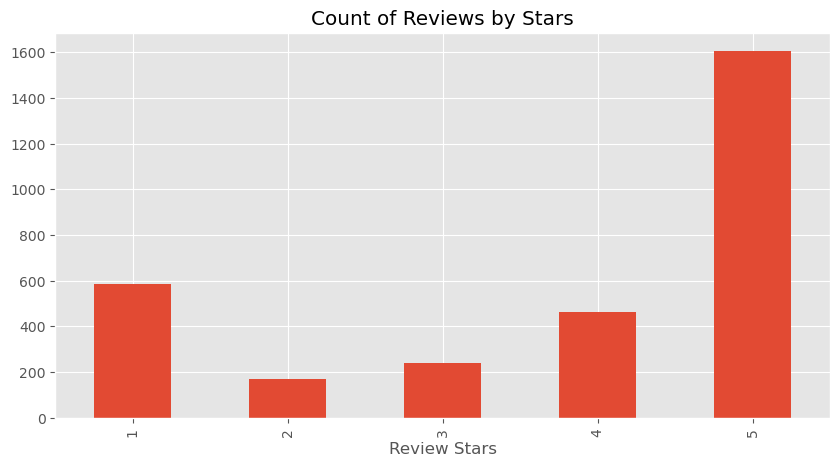

In [11]:
b_plot = df['ratingScore'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Stars', figsize=(10,5))
b_plot.set_xlabel('Review Stars')
plt.show()


In [15]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
#nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()


In [17]:
sia.polarity_scores("I just love when my coffee spills all over my shirt. 😒")

{'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.6369}

In [19]:
sia.polarity_scores('This is the worst thing ever!')

{'neg': 0.468, 'neu': 0.532, 'pos': 0.0, 'compound': -0.6588}

In [21]:
import pandas as pd
df = pd.read_csv('iphone.csv')

# Add an 'ID' column starting from 1
df['ID'] = range(1, len(df) + 1)

# Save the modified DataFrame back to a new CSV file
df.to_csv('iphone.csv', index=False)

print("IDs added successfully!")


IDs added successfully!


In [23]:
print(df)

     productAsin country        date  isVerified  ratingScore  \
0     B09G9BL5CP   India  11-08-2024        True            4   
1     B09G9BL5CP   India  16-08-2024        True            5   
2     B09G9BL5CP   India  14-05-2024        True            4   
3     B09G9BL5CP   India  24-06-2024        True            5   
4     B09G9BL5CP   India  18-05-2024        True            5   
...          ...     ...         ...         ...          ...   
3057  B09G9D8KRQ   India  11-10-2023        True            1   
3058  B09G9D8KRQ   India  14-10-2022        True            2   
3059  B09G9D8KRQ   India  24-02-2022        True            3   
3060  B09G9D8KRQ   India  16-10-2023        True            1   
3061  B09G9D8KRQ   India  11-11-2023        True            1   

                              reviewTitle  \
0                              No charger   
1                         iPhone 13 256GB   
2                 Flip camera option nill   
3                                 Produ

In [27]:
import pandas as pd
from tqdm import tqdm
from nltk.sentiment.vader import SentimentIntensityAnalyzer

res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['reviewDescription']
    myid = row['ID']
    
    if isinstance(text, str):
        res[myid] = sia.polarity_scores(text)
    else:
        
        res[myid] = {"compound": 0.0, "neg": 0.0, "neu": 1.0, "pos": 0.0}  

res


100%|██████████| 3062/3062 [00:01<00:00, 2289.48it/s]


{1: {'neg': 0.121, 'neu': 0.816, 'pos': 0.063, 'compound': -0.6954},
 2: {'neg': 0.0, 'neu': 0.596, 'pos': 0.404, 'compound': 0.9621},
 3: {'neg': 0.061, 'neu': 0.939, 'pos': 0.0, 'compound': -0.6632},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.565, 'pos': 0.435, 'compound': 0.6597},
 6: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 7: {'neg': 0.064, 'neu': 0.756, 'pos': 0.18, 'compound': 0.6124},
 8: {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404},
 9: {'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'compound': 0.4215},
 10: {'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719},
 11: {'neg': 0.064, 'neu': 0.739, 'pos': 0.197, 'compound': 0.9972},
 12: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4215},
 13: {'neg': 0.0, 'neu': 0.471, 'pos': 0.529, 'compound': 0.9259},
 14: {'neg': 0.0, 'neu': 0.685, 'pos': 0.315, 'compound': 0.8297},
 15: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 16: {'neg': 0.04, 'ne

In [37]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index' : 'ID'})
vaders = vaders.merge(df, how='left')
vaders

,ID,neg,neu,pos,compound,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,1,0.121,0.816,0.063,-0.6954,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,2,0.000,0.596,0.404,0.9621,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,3,0.061,0.939,0.000,-0.6632,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,4,0.000,1.000,0.000,0.0000,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,5,0.000,0.565,0.435,0.6597,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3057,3058,0.158,0.734,0.107,-0.4215,B09G9D8KRQ,India,11-10-2023,True,1,Very bad experience with i phone 13,Useless phon never buy this heat n useless cam...,https://www.amazon.in/gp/customer-reviews/R10O...,Reviewed in India on 11 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3058,3059,0.169,0.831,0.000,-0.7094,B09G9D8KRQ,India,14-10-2022,True,2,not happy with this apple product,iam not happy with this product why because ch...,https://www.amazon.in/gp/customer-reviews/R2FW...,Reviewed in India on 14 October 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3059,3060,0.000,0.256,0.744,0.4404,B09G9D8KRQ,India,24-02-2022,True,3,Good phone,Good phone,https://www.amazon.in/gp/customer-reviews/R2C7...,Reviewed in India on 24 February 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3060,3061,0.000,1.000,0.000,0.0000,B09G9D8KRQ,India,16-10-2023,True,1,Battery discharge,While charging mobile it's getting so hot even...,https://www.amazon.in/gp/customer-reviews/R3K0...,Reviewed in India on 16 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N


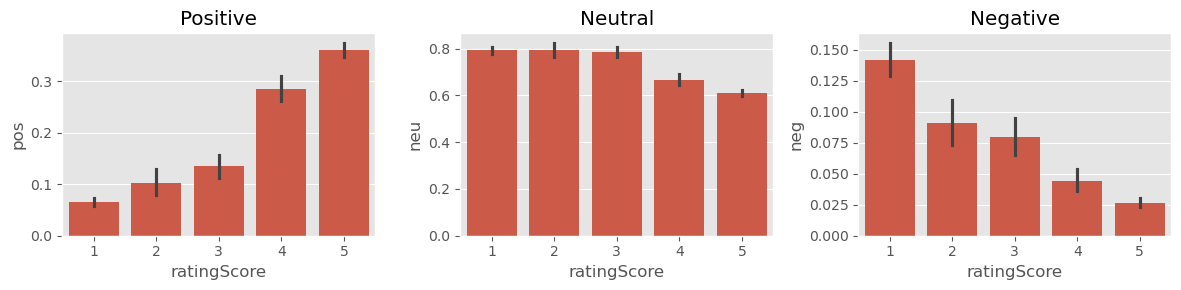

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame 'vaders' has columns named 'ID', 'pos', 'neu', 'neg', and maybe 'compound' for scores.
# Add a 'Score' column if needed
# vaders['Score'] = vaders['compound']  # or another column that represents the score you want

fig, axs = plt.subplots(1, 3, figsize=(12, 3))

# Update the 'x' parameter to use an actual column name that exists in vaders
sns.barplot(data=vaders, x='ratingScore', y='pos', ax=axs[0])  # Adjust 'ID' as necessary
sns.barplot(data=vaders, x='ratingScore', y='neu', ax=axs[1])  # Adjust 'ID' as necessary
sns.barplot(data=vaders, x='ratingScore', y='neg', ax=axs[2])  # Adjust 'ID' as necessary

# Set titles
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

plt.tight_layout()
plt.show()


In [25]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [27]:
MODEL = f'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

2024-11-11 12:23:39.408949: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731308019.465530   24033 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731308019.486540   24033 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-11 12:23:39.619761: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [29]:

def polarity_scores_roberta(text):
    encoded_text = tokenizer(text, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    
    
    overall_score = max(scores_dict.values())
    
    
    if overall_score == scores_dict['roberta_neg']:
        sentiment_label = 'Negative'
    elif overall_score == scores_dict['roberta_neu']:
        sentiment_label = 'Neutral'
    else:
        sentiment_label = 'Positive'
    
    scores_dict['overall_roberta_score'] = overall_score
    scores_dict['roberta_label'] = sentiment_label
    
    return scores_dict


mini_df = df.head(3000)
res = {}

for i, row in tqdm(mini_df.iterrows(), total=len(mini_df)):
    try:
        text = row['reviewDescription']
        myid = row['ID']
        
        if isinstance(text, str):
            vader_result = sia.polarity_scores(text)
            vader_result_rename = {f'vader_{key}': value for key, value in vader_result.items()}
            
            roberta_result = polarity_scores_roberta(text)
            both = {**vader_result_rename, **roberta_result}
            
            res[myid] = both
        else:
            print(f'Skipping non-string text for ID {myid}')
    
    except RuntimeError:
        print(f'Broke for ID {myid}')

roberta_df = pd.DataFrame(res).T
roberta_df = roberta_df.reset_index().rename(columns={'index': 'ID'})
roberta_df = roberta_df.merge(mini_df, how='left')

print(roberta_df.head())


  0%|          | 12/3000 [00:00<02:08, 23.19it/s]

Broke for ID 11


  1%|          | 30/3000 [00:01<01:52, 26.47it/s]

Skipping non-string text for ID 27


  1%|▏         | 38/3000 [00:01<01:43, 28.66it/s]

Skipping non-string text for ID 38


  2%|▏         | 48/3000 [00:02<02:13, 22.07it/s]

Broke for ID 46


  2%|▏         | 58/3000 [00:02<01:53, 25.94it/s]

Broke for ID 54


  3%|▎         | 78/3000 [00:03<01:21, 35.70it/s]

Skipping non-string text for ID 73
Broke for ID 74
Skipping non-string text for ID 77
Broke for ID 79


  4%|▍         | 119/3000 [00:04<01:20, 35.88it/s]

Broke for ID 112
Broke for ID 121


  4%|▍         | 123/3000 [00:04<01:48, 26.44it/s]

Broke for ID 124


  5%|▍         | 136/3000 [00:05<01:53, 25.24it/s]

Broke for ID 134


  5%|▌         | 150/3000 [00:05<01:27, 32.62it/s]

Skipping non-string text for ID 142
Skipping non-string text for ID 146


  6%|▌         | 168/3000 [00:06<01:22, 34.46it/s]

Skipping non-string text for ID 163


  8%|▊         | 239/3000 [00:09<01:45, 26.25it/s]

Skipping non-string text for ID 235


 10%|▉         | 286/3000 [00:11<01:42, 26.51it/s]

Skipping non-string text for ID 282


 10%|▉         | 299/3000 [00:12<01:33, 28.84it/s]

Skipping non-string text for ID 293


 10%|█         | 308/3000 [00:12<01:21, 33.03it/s]

Skipping non-string text for ID 307


 12%|█▏        | 346/3000 [00:13<01:15, 35.12it/s]

Skipping non-string text for ID 342
Skipping non-string text for ID 344


 12%|█▏        | 354/3000 [00:14<01:38, 26.97it/s]

Skipping non-string text for ID 350


 12%|█▏        | 362/3000 [00:14<01:23, 31.46it/s]

Skipping non-string text for ID 358


 13%|█▎        | 393/3000 [00:15<01:28, 29.30it/s]

Skipping non-string text for ID 390


 14%|█▎        | 411/3000 [00:16<01:44, 24.68it/s]

Skipping non-string text for ID 406
Skipping non-string text for ID 410


 14%|█▍        | 418/3000 [00:16<01:56, 22.24it/s]

Skipping non-string text for ID 420


 15%|█▌        | 461/3000 [00:18<01:22, 30.80it/s]

Broke for ID 459


 16%|█▌        | 487/3000 [00:19<01:10, 35.51it/s]

Skipping non-string text for ID 482


 17%|█▋        | 515/3000 [00:20<01:23, 29.88it/s]

Skipping non-string text for ID 510


 18%|█▊        | 538/3000 [00:21<01:37, 25.25it/s]

Skipping non-string text for ID 536


 28%|██▊       | 833/3000 [00:32<01:10, 30.67it/s]

Skipping non-string text for ID 831


 28%|██▊       | 844/3000 [00:32<01:20, 26.85it/s]

Skipping non-string text for ID 842


 29%|██▊       | 856/3000 [00:33<01:12, 29.72it/s]

Skipping non-string text for ID 853


 29%|██▉       | 870/3000 [00:33<00:57, 36.78it/s]

Skipping non-string text for ID 865
Skipping non-string text for ID 866


 31%|███       | 935/3000 [00:36<01:28, 23.37it/s]

Skipping non-string text for ID 931
Skipping non-string text for ID 936


 32%|███▏      | 956/3000 [00:37<01:04, 31.60it/s]

Broke for ID 948


 33%|███▎      | 1000/3000 [00:38<01:00, 32.91it/s]

Skipping non-string text for ID 993


 34%|███▎      | 1012/3000 [00:39<01:06, 29.99it/s]

Skipping non-string text for ID 1010


 35%|███▍      | 1047/3000 [00:40<00:58, 33.56it/s]

Skipping non-string text for ID 1041
Skipping non-string text for ID 1044


 36%|███▌      | 1065/3000 [00:40<00:50, 38.18it/s]

Skipping non-string text for ID 1061
Skipping non-string text for ID 1067


 36%|███▌      | 1084/3000 [00:41<00:49, 38.33it/s]

Skipping non-string text for ID 1077
Skipping non-string text for ID 1080
Skipping non-string text for ID 1085


 37%|███▋      | 1097/3000 [00:41<00:56, 33.67it/s]

Skipping non-string text for ID 1092


 37%|███▋      | 1105/3000 [00:42<00:57, 33.01it/s]

Skipping non-string text for ID 1103


 40%|████      | 1203/3000 [00:45<01:08, 26.28it/s]

Broke for ID 1202
Skipping non-string text for ID 1204


 43%|████▎     | 1278/3000 [00:48<00:54, 31.73it/s]

Skipping non-string text for ID 1273


 44%|████▍     | 1314/3000 [00:49<00:48, 34.43it/s]

Skipping non-string text for ID 1309
Skipping non-string text for ID 1310


 45%|████▌     | 1353/3000 [00:50<00:53, 30.69it/s]

Skipping non-string text for ID 1350


 46%|████▋     | 1395/3000 [00:52<00:50, 32.05it/s]

Skipping non-string text for ID 1390


 48%|████▊     | 1425/3000 [00:53<00:54, 29.00it/s]

Skipping non-string text for ID 1422


 49%|████▉     | 1473/3000 [00:55<00:43, 34.87it/s]

Skipping non-string text for ID 1474


 50%|█████     | 1508/3000 [00:56<00:37, 39.54it/s]

Skipping non-string text for ID 1504


 51%|█████     | 1524/3000 [00:56<00:48, 30.25it/s]

Broke for ID 1521


 55%|█████▍    | 1647/3000 [01:01<00:58, 23.12it/s]

Broke for ID 1646


 60%|██████    | 1805/3000 [01:08<00:41, 28.83it/s]

Skipping non-string text for ID 1800


 62%|██████▏   | 1865/3000 [01:10<00:47, 23.87it/s]

Skipping non-string text for ID 1863


 63%|██████▎   | 1889/3000 [01:11<00:40, 27.69it/s]

Skipping non-string text for ID 1884


 72%|███████▏  | 2149/3000 [01:22<00:25, 33.13it/s]

Broke for ID 2147


 73%|███████▎  | 2199/3000 [01:25<00:28, 27.67it/s]

Skipping non-string text for ID 2194


 74%|███████▍  | 2215/3000 [01:25<00:21, 36.53it/s]

Skipping non-string text for ID 2206
Broke for ID 2207
Skipping non-string text for ID 2210
Broke for ID 2212


 75%|███████▍  | 2240/3000 [01:26<00:26, 28.79it/s]

Broke for ID 2236


 76%|███████▌  | 2276/3000 [01:27<00:23, 31.35it/s]

Skipping non-string text for ID 2270


 77%|███████▋  | 2308/3000 [01:29<00:22, 30.71it/s]

Skipping non-string text for ID 2303
Skipping non-string text for ID 2305


 77%|███████▋  | 2317/3000 [01:29<00:19, 35.90it/s]

Skipping non-string text for ID 2314


 78%|███████▊  | 2333/3000 [01:30<00:20, 32.69it/s]

Skipping non-string text for ID 2330


 78%|███████▊  | 2341/3000 [01:30<00:23, 27.94it/s]

Skipping non-string text for ID 2340


 80%|███████▉  | 2388/3000 [01:32<00:25, 24.23it/s]

Skipping non-string text for ID 2383
Skipping non-string text for ID 2391


 80%|███████▉  | 2399/3000 [01:32<00:17, 34.83it/s]

Skipping non-string text for ID 2394


 82%|████████▎ | 2475/3000 [01:35<00:15, 33.15it/s]

Skipping non-string text for ID 2469


 83%|████████▎ | 2504/3000 [01:36<00:13, 35.88it/s]

Skipping non-string text for ID 2500
Skipping non-string text for ID 2506


 84%|████████▍ | 2513/3000 [01:36<00:12, 38.41it/s]

Skipping non-string text for ID 2509
Broke for ID 2512


 85%|████████▍ | 2542/3000 [01:37<00:13, 33.06it/s]

Skipping non-string text for ID 2535
Skipping non-string text for ID 2544


 86%|████████▋ | 2594/3000 [01:39<00:14, 27.93it/s]

Skipping non-string text for ID 2591


 89%|████████▉ | 2684/3000 [01:42<00:09, 33.88it/s]

Broke for ID 2680


 90%|█████████ | 2704/3000 [01:43<00:09, 31.19it/s]

Skipping non-string text for ID 2701
Skipping non-string text for ID 2707
Broke for ID 2708


 90%|█████████ | 2709/3000 [01:43<00:09, 32.13it/s]

Broke for ID 2711


 91%|█████████ | 2726/3000 [01:44<00:09, 29.85it/s]

Broke for ID 2719


 92%|█████████▏| 2761/3000 [01:45<00:08, 29.64it/s]

Skipping non-string text for ID 2757
Skipping non-string text for ID 2764


 93%|█████████▎| 2783/3000 [01:46<00:06, 31.67it/s]

Broke for ID 2779


 93%|█████████▎| 2793/3000 [01:46<00:05, 37.94it/s]

Skipping non-string text for ID 2787


 94%|█████████▎| 2810/3000 [01:47<00:06, 28.52it/s]

Skipping non-string text for ID 2806
Skipping non-string text for ID 2809


 96%|█████████▋| 2890/3000 [01:50<00:03, 31.03it/s]

Skipping non-string text for ID 2885


 97%|█████████▋| 2918/3000 [01:51<00:03, 24.37it/s]

Skipping non-string text for ID 2915


 99%|█████████▉| 2972/3000 [01:53<00:01, 25.30it/s]

Skipping non-string text for ID 2969
Skipping non-string text for ID 2975


100%|█████████▉| 2989/3000 [01:54<00:00, 27.39it/s]

Skipping non-string text for ID 2985
Skipping non-string text for ID 2986


100%|██████████| 3000/3000 [01:54<00:00, 26.13it/s]

   ID vader_neg vader_neu vader_pos vader_compound roberta_neg roberta_neu  \
0   1     0.121     0.816     0.063        -0.6954    0.325918    0.360007   
1   2       0.0     0.596     0.404         0.9621    0.001911    0.007702   
2   3     0.061     0.939       0.0        -0.6632    0.649357    0.291786   
3   4       0.0       1.0       0.0            0.0    0.010673    0.291744   
4   5       0.0     0.565     0.435         0.6597     0.00097    0.020073   

  roberta_pos overall_roberta_score roberta_label  ... country        date  \
0    0.314075              0.360007       Neutral  ...   India  11-08-2024   
1    0.990387              0.990387      Positive  ...   India  16-08-2024   
2    0.058858              0.649357      Negative  ...   India  14-05-2024   
3    0.697583              0.697583      Positive  ...   India  24-06-2024   
4    0.978957              0.978957      Positive  ...   India  18-05-2024   

  isVerified  ratingScore              reviewTitle  \
0       

In [37]:
roberta_df.query('ratingScore == 1').sort_values('roberta_pos', ascending=False)['reviewDescription'].values[3]

'I bought this phone Bcoz I have lot of money to showoff.'

In [101]:

sentence = "I just love when my coffee spills all over my shirt. 😒",
sentence1 = "I’m totally thrilled about working overtime!"
sentence2 ="I just can't wait to get stuck in traffic!"
result = polarity_scores_roberta(sentence)
result1= polarity_scores_roberta(sentence1)
result2 = polarity_scores_roberta(sentence2)
print(result)
print(result1)
print(result2)

{'roberta_neg': 0.47225964, 'roberta_neu': 0.28271747, 'roberta_pos': 0.24502291, 'overall_roberta_score': 0.47225964, 'roberta_label': 'Negative'}
{'roberta_neg': 0.002229529, 'roberta_neu': 0.017060526, 'roberta_pos': 0.9807099, 'overall_roberta_score': 0.9807099, 'roberta_label': 'Positive'}
{'roberta_neg': 0.46942118, 'roberta_neu': 0.2727351, 'roberta_pos': 0.2578437, 'overall_roberta_score': 0.46942118, 'roberta_label': 'Negative'}


In [41]:
roberta_df.query('ratingScore == 1').sort_values('vader_pos', ascending=False)['reviewDescription'].values[3]

'Eats battery like a syrup lol 😆.'

In [47]:
roberta_df.query('ratingScore == 5').sort_values('roberta_neg', ascending=False)['reviewDescription'].values[1]

'Not good kindly ignore'

In [65]:
roberta_df.query('ratingScore == 5').sort_values('vader_neg', ascending=False)['reviewDescription'].values[4]

'Not good kindly ignore'

In [73]:
roberta_df.head(10)

,ID,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,overall_roberta_score,roberta_label,...,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,1,0.121,0.816,0.063,-0.6954,0.325918,0.360007,0.314075,0.360007,Neutral,...,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,2,0.0,0.596,0.404,0.9621,0.001911,0.007702,0.990387,0.990387,Positive,...,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,3,0.061,0.939,0.0,-0.6632,0.649357,0.291786,0.058858,0.649357,Negative,...,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,4,0.0,1.0,0.0,0.0,0.010673,0.291744,0.697583,0.697583,Positive,...,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,5,0.0,0.565,0.435,0.6597,0.00097,0.020073,0.978957,0.978957,Positive,...,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
5,6,0.0,1.0,0.0,0.0,0.01023,0.265954,0.723816,0.723816,Positive,...,India,14-05-2024,True,5,Too smooth and effective battery life,5 star 👍,https://www.amazon.in/gp/customer-reviews/R3J3...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
6,7,0.064,0.756,0.18,0.6124,0.006302,0.059319,0.934379,0.934379,Positive,...,India,28-01-2024,True,5,Apple 13 256 GB,"Great Product... Nothing to say, as the Name A...",https://www.amazon.in/gp/customer-reviews/R2ZM...,Reviewed in India on 28 January 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
7,8,0.0,0.408,0.592,0.4404,0.002176,0.038864,0.95896,0.95896,Positive,...,India,01-03-2024,True,5,Good,Good product 😀💯,https://www.amazon.in/gp/customer-reviews/R1XF...,Reviewed in India on 1 March 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
8,9,0.0,0.263,0.737,0.4215,0.010234,0.096475,0.893291,0.893291,Positive,...,India,14-11-2023,True,4,Good,Nice product,https://www.amazon.in/gp/customer-reviews/R2QA...,Reviewed in India on 14 November 2023,Colour: MidnightSize: 256 GB,B09G9BQS98
9,10,0.0,0.213,0.787,0.5719,0.017858,0.154092,0.82805,0.82805,Positive,...,India,03-02-2024,True,5,Excellent,Excellent product,https://www.amazon.in/gp/customer-reviews/R322...,Reviewed in India on 3 February 2024,Colour: MidnightSize: 256 GB,B09G9BQS98


In [75]:
from transformers import pipeline
sent_pipeline = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')


In [77]:
res = {}
for i, row in tqdm(roberta_df.iterrows(), total=len(roberta_df)):
    try:
        text = row['reviewDescription']
        myid = row['ID']
        res[myid] = sent_pipeline(text)
    except RuntimeError:
        print(f'Broke for id {myid}')

res

100%|██████████| 2892/2892 [00:58<00:00, 49.55it/s]


{1: [{'label': 'NEGATIVE', 'score': 0.9879354238510132}],
 2: [{'label': 'POSITIVE', 'score': 0.9997765421867371}],
 3: [{'label': 'NEGATIVE', 'score': 0.9979085922241211}],
 4: [{'label': 'POSITIVE', 'score': 0.9998630285263062}],
 5: [{'label': 'POSITIVE', 'score': 0.99869304895401}],
 6: [{'label': 'POSITIVE', 'score': 0.9949733018875122}],
 7: [{'label': 'POSITIVE', 'score': 0.9201740026473999}],
 8: [{'label': 'POSITIVE', 'score': 0.9998041987419128}],
 9: [{'label': 'POSITIVE', 'score': 0.9998539686203003}],
 10: [{'label': 'POSITIVE', 'score': 0.9998617172241211}],
 12: [{'label': 'POSITIVE', 'score': 0.9998552799224854}],
 13: [{'label': 'POSITIVE', 'score': 0.99982088804245}],
 14: [{'label': 'POSITIVE', 'score': 0.9997901320457458}],
 15: [{'label': 'NEGATIVE', 'score': 0.9984902143478394}],
 16: [{'label': 'POSITIVE', 'score': 0.9983861446380615}],
 17: [{'label': 'NEGATIVE', 'score': 0.9970890879631042}],
 18: [{'label': 'POSITIVE', 'score': 0.9998797178268433}],
 19: [{'la

In [95]:

sentence = "I just love when my coffee spills all over my shirt. 😒"
result = sent_pipeline(sentence)
print(result)


[{'label': 'POSITIVE', 'score': 0.999294638633728}]


In [79]:
result_dict = {}

for key, value in res.items():
    inner_dict = value[0]  # Assuming each list has only one dictionary
    result_dict[key] = inner_dict

# Print the result
print(result_dict)

{1: {'label': 'NEGATIVE', 'score': 0.9879354238510132}, 2: {'label': 'POSITIVE', 'score': 0.9997765421867371}, 3: {'label': 'NEGATIVE', 'score': 0.9979085922241211}, 4: {'label': 'POSITIVE', 'score': 0.9998630285263062}, 5: {'label': 'POSITIVE', 'score': 0.99869304895401}, 6: {'label': 'POSITIVE', 'score': 0.9949733018875122}, 7: {'label': 'POSITIVE', 'score': 0.9201740026473999}, 8: {'label': 'POSITIVE', 'score': 0.9998041987419128}, 9: {'label': 'POSITIVE', 'score': 0.9998539686203003}, 10: {'label': 'POSITIVE', 'score': 0.9998617172241211}, 12: {'label': 'POSITIVE', 'score': 0.9998552799224854}, 13: {'label': 'POSITIVE', 'score': 0.99982088804245}, 14: {'label': 'POSITIVE', 'score': 0.9997901320457458}, 15: {'label': 'NEGATIVE', 'score': 0.9984902143478394}, 16: {'label': 'POSITIVE', 'score': 0.9983861446380615}, 17: {'label': 'NEGATIVE', 'score': 0.9970890879631042}, 18: {'label': 'POSITIVE', 'score': 0.9998797178268433}, 19: {'label': 'NEGATIVE', 'score': 0.5157206654548645}, 20: 

In [81]:
pipeline_df = pd.DataFrame(result_dict).T
pipeline_df = pipeline_df.reset_index().rename(columns={'index': 'ID'})
rename_dict = {'label':'pipeline_label', 'score':'pipeline_score'}
pipeline_df.rename(columns=rename_dict, inplace=True)
pipeline_df.head()


,ID,pipeline_label,pipeline_score
0,1,NEGATIVE,0.987935
1,2,POSITIVE,0.999777
2,3,NEGATIVE,0.997909
3,4,POSITIVE,0.999863
4,5,POSITIVE,0.998693


In [83]:
pipeline_df = pipeline_df.merge(roberta_df, how='left')
pipeline_df.head()

,ID,pipeline_label,pipeline_score,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,...,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,1,NEGATIVE,0.987935,0.121,0.816,0.063,-0.6954,0.325918,0.360007,0.314075,...,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,2,POSITIVE,0.999777,0.0,0.596,0.404,0.9621,0.001911,0.007702,0.990387,...,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,3,NEGATIVE,0.997909,0.061,0.939,0.0,-0.6632,0.649357,0.291786,0.058858,...,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,4,POSITIVE,0.999863,0.0,1.0,0.0,0.0,0.010673,0.291744,0.697583,...,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,5,POSITIVE,0.998693,0.0,0.565,0.435,0.6597,0.00097,0.020073,0.978957,...,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98


In [85]:

pipeline_df = pipeline_df.merge(roberta_df, how='left')
pipeline_df.to_csv('final_analysis.csv', index=False)
